In [188]:
# Imports
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt 

## Analyze FEL

In [277]:
# FEL
#path = "../FEL"

#path = "../subsampled_fasta_keepAligned_Results"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]


# FEL on Subsampling_with_TN93-Algo , used BDNF alignment not p53
#path = "../../Test_TN93_algo_subsamples"
#ending = ".FEL.json"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(ending)]
#output_header = "../../Plots/BDNF_TN93Algo_FEL_AllBranches"

# FEL Internal on Subsampling_with_TN93-Algo , used BDNF alignment not p53
path = "../../Test_TN93_algo_subsamples"
files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL_internal.json")]
output_header = "../../Plots/BDNF_TN93Algo_FEL_InternalBranches"

files

['../../Test_TN93_algo_subsamples/Test.aln_subsampled_168.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_218.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_34.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_156.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_96.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_226.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_185.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_45.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_119.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_127.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_74.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_128.fasta.FEL_internal.jso

In [278]:
data_dict = {}
pvalue_threshold = 0.1

def return_positive_sites_count(MLE):
    global pvalue_threshold
    data_list = []
    count = 0
    for n, item in enumerate(MLE):
        if float(item[4] < pvalue_threshold): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega > 1.0:
                count += 1
                site = n + 1
                data_list.append(site)
            #end if
        #end if
    #end for
    return count, data_list
#end method

def return_negative_sites_count(MLE):
    global pvalue_threshold
    data_list = []
    count = 0
    for n, item in enumerate(MLE):
        if float(item[4] < pvalue_threshold): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega < 1.0:
                count += 1
                site = n + 1
                data_list.append(site)
            #end if
        #end if
    #end for
    return count, data_list
#end method


# Main -------------------------------------------------
count = 1

for filename in files:
    if os.stat(filename).st_size == 0: continue
    with open(filename, "r") as fh:
        json_data = json.load(fh)
    #end with
    num_seqs = json_data["input"]["number of sequences"]
    num_sites = json_data["input"]["number of sites"]
    print(filename.split("/")[-1], num_seqs, num_sites)
    
    positive_sites, positive_sites_list = return_positive_sites_count(json_data["MLE"]["content"]["0"])
    negative_sites, negative_sites_list = return_negative_sites_count(json_data["MLE"]["content"]["0"])
    
    
    # p-values
    p_values_list = []
    for item in json_data["MLE"]["content"]["0"]:
        p_value = item[4]
        p_values_list.append(p_value)
    #end for
    
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    data_dict[count] = {"Filename":filename.split("/")[-1],
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "negative_sites": negative_sites, 
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "negative_sites_list" : negative_sites_list,
                        "p_values":p_values_list}
            
    count += 1
#end for

Test.aln_subsampled_168.fasta.FEL_internal.json 151 634
Test.aln_subsampled_218.fasta.FEL_internal.json 101 634
Test.aln_subsampled_34.fasta.FEL_internal.json 285 634
Test.aln_subsampled_156.fasta.FEL_internal.json 163 634
Test.aln_subsampled_96.fasta.FEL_internal.json 223 634
Test.aln_subsampled_226.fasta.FEL_internal.json 93 634
Test.aln_subsampled_185.fasta.FEL_internal.json 134 634
Test.aln_subsampled_45.fasta.FEL_internal.json 274 634
Test.aln_subsampled_119.fasta.FEL_internal.json 200 634
Test.aln_subsampled_127.fasta.FEL_internal.json 192 634
Test.aln_subsampled_74.fasta.FEL_internal.json 245 634
Test.aln_subsampled_128.fasta.FEL_internal.json 191 634
Test.aln_subsampled_116.fasta.FEL_internal.json 203 634
Test.aln_subsampled_159.fasta.FEL_internal.json 160 634
Test.aln_subsampled_229.fasta.FEL_internal.json 90 634
Test.aln_subsampled_99.fasta.FEL_internal.json 220 634
Test.aln_subsampled_167.fasta.FEL_internal.json 152 634
Test.aln_subsampled_217.fasta.FEL_internal.json 102 634

Test.aln_subsampled_29.fasta.FEL_internal.json 290 634
Test.aln_subsampled_17.fasta.FEL_internal.json 302 634
Test.aln_subsampled_166.fasta.FEL_internal.json 153 634
Test.aln_subsampled_216.fasta.FEL_internal.json 103 634
Test.aln_subsampled_158.fasta.FEL_internal.json 161 634
Test.aln_subsampled_98.fasta.FEL_internal.json 221 634
Test.aln_subsampled_228.fasta.FEL_internal.json 91 634
Test.aln_subsampled_117.fasta.FEL_internal.json 202 634
Test.aln_subsampled_75.fasta.FEL_internal.json 244 634
Test.aln_subsampled_129.fasta.FEL_internal.json 190 634
Test.aln_subsampled_126.fasta.FEL_internal.json 193 634
Test.aln_subsampled_184.fasta.FEL_internal.json 135 634
Test.aln_subsampled_44.fasta.FEL_internal.json 275 634
Test.aln_subsampled_118.fasta.FEL_internal.json 201 634
Test.aln_subsampled_157.fasta.FEL_internal.json 162 634
Test.aln_subsampled_227.fasta.FEL_internal.json 92 634
Test.aln_subsampled_97.fasta.FEL_internal.json 222 634
Test.aln_subsampled_169.fasta.FEL_internal.json 150 634


In [279]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df

Filename  num_seqs  num_sites  \
1    Test.aln_subsampled_168.fasta.FEL_internal.json       151        634   
2    Test.aln_subsampled_218.fasta.FEL_internal.json       101        634   
3     Test.aln_subsampled_34.fasta.FEL_internal.json       285        634   
4    Test.aln_subsampled_156.fasta.FEL_internal.json       163        634   
5     Test.aln_subsampled_96.fasta.FEL_internal.json       223        634   
..                                               ...       ...        ...   
234   Test.aln_subsampled_21.fasta.FEL_internal.json       298        634   
235  Test.aln_subsampled_132.fasta.FEL_internal.json       187        634   
236    Test.aln_subsampled_1.fasta.FEL_internal.json       318        634   
237   Test.aln_subsampled_50.fasta.FEL_internal.json       269        634   
238  Test.aln_subsampled_190.fasta.FEL_internal.json       129        634   

     negative_sites  positive_sites  \
1               230               9   
2               224               8   
3               239               8   
4               230              12   
5               231              14   
..              ...             ...   
234             241               8   
235             228              11   
236             242               8   
237             236               9   
238             231               8   

                                   positive_sites_list  \
1             [9, 11, 59, 83, 104, 106, 139, 222, 243]   
2             [104, 106, 107, 118, 120, 139, 154, 188]   
3                [11, 59, 83, 106, 139, 150, 222, 243]   
4    [8, 11, 59, 83, 106, 139, 154, 168, 181, 201, ...   
5    [8, 11, 59, 73, 79, 83, 139, 150, 154, 181, 18...   
..                                                 ...   
234              [11, 59, 83, 139, 150, 181, 222, 243]   
235  [11, 59, 83, 106, 139, 154, 181, 186, 201, 222...   
236              [8, 59, 128, 139, 181, 186, 222, 243]   
237         [11, 59, 83, 106, 139, 154, 181, 222, 243]   
238             [59, 83, 104, 106, 139, 154, 222, 243]   

                                   negative_sites_list  \
1    [105, 121, 123, 125, 133, 153, 158, 184, 225, ...   
2    [53, 105, 116, 133, 167, 225, 233, 234, 238, 2...   
3    [53, 55, 99, 117, 138, 151, 153, 158, 192, 202...   
4    [117, 123, 129, 151, 153, 158, 225, 226, 233, ...   
5    [138, 151, 153, 158, 225, 226, 233, 234, 238, ...   
..                                                 ...   
234  [53, 55, 99, 117, 138, 151, 153, 158, 192, 202...   
235  [53, 119, 151, 153, 158, 225, 226, 233, 234, 2...   
236  [2, 55, 99, 123, 138, 151, 153, 158, 192, 202,...   
237  [53, 55, 99, 117, 138, 151, 153, 158, 202, 225...   
238  [51, 86, 105, 110, 121, 123, 125, 129, 133, 15...   

                                              p_values  
1    [1, 1, 0.1187861787077399, 0.1635947877985107,...  
2    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0.8993894344248524...  
3    [1, 1, 0.1927646535292398, 0.14099699233666, 0...  
4    [1, 1, 0.1345928855725192, 0.1614365443303988,...  
5    [1, 1, 0.1595901972341714, 0.2017213353673285,...  
..                                                 ...  
234  [1, 1, 0.1920643399850754, 0.141009973048815, ...  
235  [1, 1, 0.1445206216298315, 0.2073692272279077,...  
236  [1, 0.02797719930780052, 0.4832763968792168, 0...  
237  [1, 1, 0.1788737477610444, 0.2379922777274046,...  
238  [1, 1, 0.2495941591463915, 0.2243155057105982,...  

[238 rows x 8 columns]

In [280]:
df.sort_values(by=['num_seqs'], ascending=False, inplace=True)
df

Filename  num_seqs  num_sites  \
236    Test.aln_subsampled_1.fasta.FEL_internal.json       318        634   
130    Test.aln_subsampled_2.fasta.FEL_internal.json       317        634   
52     Test.aln_subsampled_3.fasta.FEL_internal.json       316        634   
96     Test.aln_subsampled_4.fasta.FEL_internal.json       315        634   
203    Test.aln_subsampled_5.fasta.FEL_internal.json       314        634   
..                                               ...       ...        ...   
145  Test.aln_subsampled_234.fasta.FEL_internal.json        85        634   
35   Test.aln_subsampled_235.fasta.FEL_internal.json        84        634   
100  Test.aln_subsampled_236.fasta.FEL_internal.json        83        634   
199  Test.aln_subsampled_237.fasta.FEL_internal.json        82        634   
211  Test.aln_subsampled_238.fasta.FEL_internal.json        81        634   

     negative_sites  positive_sites  \
236             242               8   
130             240              10   
52              240              10   
96              240               9   
203             240               9   
..              ...             ...   
145             222               7   
35              221               7   
100             220               7   
199             219               8   
211             219               9   

                                 positive_sites_list  \
236            [8, 59, 128, 139, 181, 186, 222, 243]   
130  [8, 59, 128, 139, 150, 155, 181, 186, 222, 243]   
52   [8, 59, 128, 139, 150, 155, 181, 186, 222, 243]   
96        [8, 59, 128, 139, 150, 181, 186, 222, 243]   
203       [8, 59, 128, 139, 150, 181, 186, 222, 243]   
..                                               ...   
145              [104, 106, 107, 118, 120, 139, 154]   
35               [104, 106, 107, 118, 120, 139, 154]   
100              [104, 106, 107, 118, 120, 139, 154]   
199         [104, 106, 107, 118, 120, 139, 154, 222]   
211    [104, 106, 107, 118, 120, 139, 142, 154, 222]   

                                   negative_sites_list  \
236  [2, 55, 99, 123, 138, 151, 153, 158, 192, 202,...   
130  [2, 55, 99, 123, 138, 151, 153, 158, 202, 225,...   
52   [2, 55, 99, 123, 138, 151, 153, 158, 202, 225,...   
96   [2, 55, 99, 123, 138, 151, 153, 158, 202, 225,...   
203  [2, 55, 99, 123, 138, 151, 153, 158, 202, 225,...   
..                                                 ...   
145  [53, 105, 110, 117, 123, 167, 225, 233, 234, 2...   
35   [53, 105, 117, 123, 167, 225, 233, 234, 238, 2...   
100  [53, 105, 110, 117, 123, 167, 225, 233, 234, 2...   
199  [53, 105, 110, 117, 123, 167, 225, 233, 234, 2...   
211  [53, 105, 110, 117, 123, 167, 225, 233, 234, 2...   

                                              p_values  
236  [1, 0.02797719930780052, 0.4832763968792168, 0...  
130  [1, 0.02751939316612817, 0.4860897284766054, 0...  
52   [1, 0.02752302530985373, 0.4861061974443857, 0...  
96   [1, 0.02785552456720664, 0.4906744258127314, 0...  
203  [1, 0.02786885054464616, 0.4908084719691523, 0...  
..                                                 ...  
145  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9191301659635502...  
35   [1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9093728348609784...  
100  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9259760588855657...  
199  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9350475030316959...  
211  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0.8826502171688926...  

[238 rows x 8 columns]

<AxesSubplot:xlabel='num_seqs', ylabel='num_sites'>

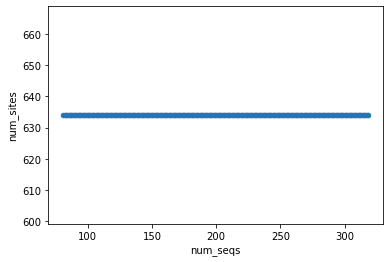

In [281]:
df.plot(x="num_seqs", y="num_sites", kind="scatter")

## Positively selected sites

In [282]:
x = df["positive_sites_list"].tolist()
from itertools import chain 
flatten_list = list(chain.from_iterable(x)) 
#"",".join(x)
#x
positive_unique_sites = set(flatten_list)
positive_unique_sites

{8,
 9,
 11,
 52,
 59,
 73,
 79,
 83,
 87,
 100,
 101,
 103,
 104,
 106,
 107,
 108,
 111,
 118,
 119,
 120,
 124,
 128,
 139,
 142,
 150,
 154,
 155,
 156,
 165,
 168,
 181,
 183,
 186,
 188,
 197,
 200,
 201,
 216,
 222,
 243,
 620}

<AxesSubplot:>

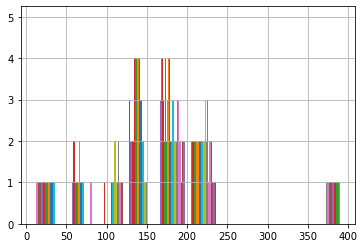

In [265]:
df["positive_sites_list"].hist()

In [283]:

fig = go.Figure()
df.sort_values(by=['num_seqs'], ascending=False, inplace=True)


#sorted(list(
for item in sorted(list(positive_unique_sites)):
#for item in positive_unique_sites:
    #print(item)
    x = df["num_seqs"].tolist()
    y = [y[item-1] for y in df["p_values"]]
    #print(item, y)
    fig.add_trace(go.Scatter(x=x, y=y,
                        mode='lines+markers',
                        name=item))
#end for
#title='p53 empirical alignment (Treemmer subsampled, keep-aligned) FEL Positively selected sites'

title = output_header.split("/")[-1] + " -> FEL (+) Sites n=" + str(len(positive_unique_sites))
#title = "BDNF empiricial alignment - Subsampled TN93-Algo, keep aligned, FEL (+) Sites n=" + str(len(positive_unique_sites))

fig.update_layout(title=title,
                   yaxis_title='p-value',
                   xaxis_title='Number of Sequences')

fig.show()

import plotly
#plotly.offline.plot(fig, filename = output_header + '.html', auto_open=False)
plotly.offline.plot(fig, filename = output_header + '_PositiveSites.html', auto_open=False)

'../../Plots/BDNF_TN93Algo_FEL_InternalBranches_PositiveSites.html'

## Negatively selected sites

In [284]:
x = df["negative_sites_list"].tolist()
from itertools import chain 
flatten_list = list(chain.from_iterable(x)) 
#"",".join(x)
#x
negative_unique_sites = set(flatten_list)
len(negative_unique_sites)

272

<AxesSubplot:>

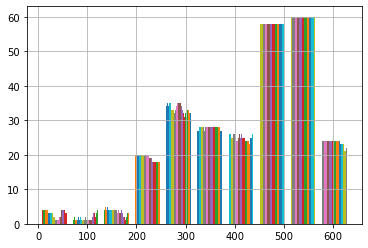

In [275]:
df["negative_sites_list"].hist()

In [285]:
fig = go.Figure()
#df.sort_values(by=['num_seqs'], ascending=False, inplace=True)

for item in sorted(list(negative_unique_sites)):
    #print(item)
    x = df["num_seqs"].tolist()
    y = [y[item-1] for y in df["p_values"]]
    #print(item, y)
    fig.add_trace(go.Scatter(x=x, y=y,
                        mode='lines',
                        name=item))
#end for
#title='p53 empirical alignment (Treemmer subsampled, keep-aligned) FEL Negatively selected sites'
#title="BDNF empiricial alignment - Subsampled TN93-Algo, keep aligned, FEL Internal (-) Sites n=" + str(len(negative_unique_sites))

title = output_header.split("/")[-1] + " -> FEL (-) Sites n=" + str(len(negative_unique_sites))

fig.update_layout(title=title,
                   yaxis_title='p-value',
                   xaxis_title='Number of Sequences')

#fig.update_layout(showlegend=False)

fig.show()

import plotly
#plotly.offline.plot(fig, filename = 'filename.html', auto_open=False)
plotly.offline.plot(fig, filename = output_header + '_NegativeSites.html', auto_open=False)
#py.plot(fig, filename='name.html') 

'../../Plots/BDNF_TN93Algo_FEL_InternalBranches_NegativeSites.html'

## Analyze MEME


In [226]:
# MEME - KeepAligned    
#path = "../subsampled_fasta_keepAligned_Results"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]

# MEME on Subsampling_with_TN93-Algo , used BDNF alignment not p53
#path = "../../Test_TN93_algo_subsamples"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME.json")]
#output_header = "../../Plots/BDNF_TN93Algo_MEME_AllBranches"


# MEME Internal on Subsampling_with_TN93-Algo , used BDNF alignment not p53
path = "../../Test_TN93_algo_subsamples"
files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".MEME_internal.json")]
output_header = "../../Plots/BDNF_TN93Algo_MEME_InternalBranches"

In [227]:
data_dict = {}
pvalue_threshold = 0.1

def return_positive_sites_count(MLE):
    global pvalue_threshold
    
    data_list = []
    count = 0
    
    for n, item in enumerate(MLE):
        if float(item[6] < pvalue_threshold): 
            count += 1
            site = n + 1
            data_list.append(site)
                
         
        #end if
    #end for
    return count, data_list
#end method

# Main -------------------------------------------------
count = 1

for filename in files:
    
    if os.stat(filename).st_size == 0: continue
    
    with open(filename, "r") as fh:
        try:
            json_data = json.load(fh)
        except:
            continue
        #end try
    #end with
    
    num_seqs = json_data["input"]["number of sequences"]
    num_sites = json_data["input"]["number of sites"]
    
    # Here
    print(filename.split("/")[-1], num_seqs, num_sites)
    
    positive_sites, positive_sites_list = return_positive_sites_count(json_data["MLE"]["content"]["0"])
    #negative_sites, negative_sites_list = return_negative_sites_count(json_data["MLE"]["content"]["0"])
    
    
    # p-values
    p_values_list = []
    
    for item in json_data["MLE"]["content"]["0"]:
        p_value = item[6] # updated for MEME
        p_values_list.append(p_value)
    #end for
    
    """
    data_dict[count] = {"Filename":filename.split("/")[-1],
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "negative_sites": negative_sites, 
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "negative_sites_list" : negative_sites_list,
                        "p_values":p_values_list}
    """
    data_dict[count] = {"Filename":filename.split("/")[-1],
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "p_values":p_values_list}
    
    
    count += 1
#end for

Test.aln_subsampled_220.fasta.MEME_internal.json 99 634
Test.aln_subsampled_217.fasta.MEME_internal.json 102 634
Test.aln_subsampled_50.fasta.MEME_internal.json 269 634
Test.aln_subsampled_67.fasta.MEME_internal.json 252 634
Test.aln_subsampled_118.fasta.MEME_internal.json 201 634
Test.aln_subsampled_176.fasta.MEME_internal.json 143 634
Test.aln_subsampled_141.fasta.MEME_internal.json 178 634
Test.aln_subsampled_89.fasta.MEME_internal.json 230 634
Test.aln_subsampled_63.fasta.MEME_internal.json 256 634
Test.aln_subsampled_54.fasta.MEME_internal.json 265 634
Test.aln_subsampled_213.fasta.MEME_internal.json 106 634
Test.aln_subsampled_224.fasta.MEME_internal.json 95 634
Test.aln_subsampled_198.fasta.MEME_internal.json 121 634
Test.aln_subsampled_145.fasta.MEME_internal.json 174 634
Test.aln_subsampled_172.fasta.MEME_internal.json 147 634
Test.aln_subsampled_58.fasta.MEME_internal.json 261 634
Test.aln_subsampled_36.fasta.MEME_internal.json 283 634
Test.aln_subsampled_228.fasta.MEME_inter

Test.aln_subsampled_72.fasta.MEME_internal.json 247 634
Test.aln_subsampled_98.fasta.MEME_internal.json 221 634
Test.aln_subsampled_86.fasta.MEME_internal.json 233 634
Test.aln_subsampled_35.fasta.MEME_internal.json 284 634
Test.aln_subsampled_197.fasta.MEME_internal.json 122 634
Test.aln_subsampled_124.fasta.MEME_internal.json 195 634
Test.aln_subsampled_113.fasta.MEME_internal.json 206 634
Test.aln_subsampled_82.fasta.MEME_internal.json 237 634
Test.aln_subsampled_31.fasta.MEME_internal.json 288 634
Test.aln_subsampled_218.fasta.MEME_internal.json 101 634
Test.aln_subsampled_68.fasta.MEME_internal.json 251 634
Test.aln_subsampled_193.fasta.MEME_internal.json 126 634
Test.aln_subsampled_117.fasta.MEME_internal.json 202 634
Test.aln_subsampled_120.fasta.MEME_internal.json 199 634
Test.aln_subsampled_179.fasta.MEME_internal.json 140 634
Test.aln_subsampled_223.fasta.MEME_internal.json 96 634
Test.aln_subsampled_214.fasta.MEME_internal.json 105 634
Test.aln_subsampled_53.fasta.MEME_inter

In [228]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.sort_values(by=['num_seqs'], ascending=False, inplace=True) # MEME dataframe
#df.to_csv("MEME_KeepAligned_FollowSites.csv")
df

Filename  num_seqs  num_sites  \
222    Test.aln_subsampled_1.fasta.MEME_internal.json       318        634   
60     Test.aln_subsampled_2.fasta.MEME_internal.json       317        634   
39     Test.aln_subsampled_3.fasta.MEME_internal.json       316        634   
142    Test.aln_subsampled_4.fasta.MEME_internal.json       315        634   
235    Test.aln_subsampled_5.fasta.MEME_internal.json       314        634   
..                                                ...       ...        ...   
223  Test.aln_subsampled_234.fasta.MEME_internal.json        85        634   
146  Test.aln_subsampled_235.fasta.MEME_internal.json        84        634   
40   Test.aln_subsampled_236.fasta.MEME_internal.json        83        634   
61   Test.aln_subsampled_237.fasta.MEME_internal.json        82        634   
213  Test.aln_subsampled_238.fasta.MEME_internal.json        81        634   

     positive_sites                                positive_sites_list  \
222              40  [8, 59, 62, 100, 106, 119, 122, 128, 129, 130,...   
60               37  [8, 59, 62, 100, 106, 119, 122, 128, 129, 130,...   
39               38  [8, 59, 100, 106, 119, 122, 128, 129, 130, 139...   
142              39  [8, 59, 100, 106, 119, 122, 128, 129, 130, 139...   
235              37  [8, 59, 62, 100, 106, 119, 122, 128, 129, 130,...   
..              ...                                                ...   
223              20  [100, 101, 104, 106, 107, 118, 119, 127, 130, ...   
146              20  [100, 101, 104, 106, 107, 118, 119, 127, 130, ...   
40               19  [100, 101, 104, 106, 107, 118, 127, 130, 131, ...   
61               21  [100, 101, 104, 106, 107, 118, 127, 130, 131, ...   
213              23  [100, 101, 104, 106, 107, 118, 119, 127, 130, ...   

                                              p_values  
222  [1, 0.6666666666666666, 0.4316178825670992, 0....  
60   [1, 0.6666666666666666, 0.4334350015496429, 0....  
39   [1, 0.6666666666666666, 0.4336689890992272, 0....  
142  [1, 0.6666666666666666, 0.4365268290921456, 0....  
235  [1, 0.6666666666666666, 0.4365222046718585, 0....  
..                                                 ...  
223  [1, 1, 1, 1, 0.6666666666666666, 0.66666666666...  
146  [1, 1, 1, 1, 0.6666666666666666, 0.66666666666...  
40   [1, 1, 1, 1, 0.6666666666666666, 0.66666666666...  
61   [1, 1, 1, 1, 0.6666666666666666, 0.66666666666...  
213  [1, 1, 1, 1, 0.6666666666666666, 0.66666666666...  

[238 rows x 6 columns]

In [229]:
x = df["positive_sites_list"].tolist()
from itertools import chain 
flatten_list = list(chain.from_iterable(x)) 
meme_positive_unique_sites = set(flatten_list)
print(len(meme_positive_unique_sites))
meme_positive_unique_sites

88


{4,
 7,
 8,
 11,
 52,
 59,
 62,
 73,
 79,
 83,
 86,
 87,
 88,
 100,
 101,
 103,
 104,
 105,
 106,
 107,
 108,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 139,
 140,
 142,
 144,
 150,
 152,
 154,
 155,
 156,
 164,
 165,
 166,
 167,
 168,
 169,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 188,
 190,
 191,
 194,
 195,
 196,
 197,
 199,
 200,
 201,
 215,
 216,
 222,
 243,
 248,
 257,
 260,
 265,
 266,
 295,
 314,
 381,
 405,
 413,
 438,
 515,
 516,
 558,
 562,
 614,
 615,
 620}

<AxesSubplot:>

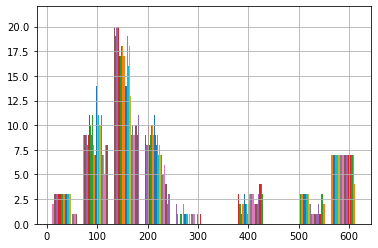

In [224]:
# MEME
df["positive_sites_list"].hist()

In [231]:
fig = go.Figure()
df.sort_values(by=['num_seqs'], ascending=False, inplace=True) # MEME dataframe, confirm

#for item in meme_positive_unique_sites: # item is already 1-indexed, it representes the site.
#sorted(list(meme_positive_unique_sites))
for item in sorted(list(meme_positive_unique_sites)): # item is already 1-indexed, it representes the site.
    x = df["num_seqs"].tolist()
    y = [y[item-1] for y in df["p_values"]] # p values
    fig.add_trace(go.Scatter(x=x, y=y,
                        mode='lines',
                        name=item))
#end for
#title='p53 empirical alignment (Treemmer subsampled, keep-aligned) MEME Episodic selected sites'
title="BDNF empiricial alignment - Subsampled TN93-Algo, keep aligned, MEME Internal (+) Sites n=" + str(len(meme_positive_unique_sites))


fig.update_layout(title=title,
                   yaxis_title='p-value',
                   xaxis_title='Number of Sequences')

#fig.update_layout(showlegend=False)
#fig.update_layout(hovermode='x unified')
fig.update_layout(legend_traceorder="normal")
#fig.update_layout(dict(yaxis2={'anchor': 'x', 'overlaying': 'y', 'side': 'left'},
#                  yaxis={'anchor': 'x', 'domain': [0.0, 1.0], 'side':'right'}))
fig.show()

import plotly
#plotly.offline.plot(fig, filename = 'MEME_p53_KeepAligned_FollowSites.html', auto_open=False)
plotly.offline.plot(fig, filename = output_header + '_PositiveSites.html', auto_open=False)

'../../Plots/BDNF_TN93Algo_MEME_InternalBranches_PositiveSites.html'

## Extra code, ignore

In [18]:
import plotly.express as px
fig = px.histogram(df, x="positive_sites_list")
fig.show()

In [23]:
new_list = []
for item in df["positive_sites_list"]:
    #print(item)
    new_list.append(item)

In [27]:
import itertools
#a = [['a','b'], ['c']]
print(list(itertools.chain.from_iterable(new_list)))
x=list(itertools.chain.from_iterable(new_list))

[66, 126, 62, 72, 223, 241, 66, 126, 107, 206, 224, 88, 88, 88, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 87, 96, 207, 90, 201, 90, 201, 90, 201, 91, 91, 91, 91, 91, 192, 91, 192, 90, 90, 90, 90, 90, 84, 86, 91, 91, 91, 95, 97, 89, 95, 95, 97, 95, 97, 95, 97, 199, 88, 90, 88, 90, 123, 101, 103, 132, 101, 103, 132, 101, 103, 132, 101, 103, 132, 96, 96, 96, 96, 96, 96, 131, 207, 96, 131, 207, 96, 131, 208, 96, 128, 205, 94, 96, 122, 94, 96, 122, 96, 102, 107, 125, 158, 89, 104, 94, 124, 95, 96, 107, 124, 155, 101, 108, 199, 101, 108, 199, 101, 108, 199, 99, 124, 98, 105, 98, 105, 99, 106, 86, 87, 88, 95, 114, 84, 85, 86, 187, 84, 85, 86, 187, 84, 86, 84, 86, 85, 87, 85, 87, 121, 89, 86, 97, 88, 95, 84, 85, 86, 95, 85, 86, 87, 96, 90, 91, 98, 125, 88, 89, 100, 119, 80, 87, 105, 79, 80, 91, 109, 81, 82, 93, 115, 190, 80, 91, 109, 75, 77, 112, 139, 75, 

In [30]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

#x = np.random.randn(500)

fig = go.Figure(data=[go.Histogram(x=x, bins=600)])
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Histogram: 'bins'

Did you mean "xbins"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        autobinx
            Obsolete: since v1.42 each bin attribute is auto-
            determined separately and `autobinx` is not needed.
            However, we accept `autobinx: true` or `false` and will
            update `xbins` accordingly before deleting `autobinx`
            from the trace.
        autobiny
            Obsolete: since v1.42 each bin attribute is auto-
            determined separately and `autobiny` is not needed.
            However, we accept `autobiny: true` or `false` and will
            update `ybins` accordingly before deleting `autobiny`
            from the trace.
        bingroup
            Set a group of histogram traces which will have
            compatible bin settings. Note that traces on the same
            subplot and with the same "orientation" under `barmode`
            "stack", "relative" and "group" are forced into the
            same bingroup, Using `bingroup`, traces under `barmode`
            "overlay" and on different axes (of the same axis type)
            can have compatible bin settings. Note that histogram
            and histogram2d* trace can share the same `bingroup`
        cumulative
            :class:`plotly.graph_objects.histogram.Cumulative`
            instance or dict with compatible properties
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            customdata .
        error_x
            :class:`plotly.graph_objects.histogram.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.histogram.ErrorY` instance
            or dict with compatible properties
        histfunc
            Specifies the binning function used for this histogram
            trace. If "count", the histogram values are computed by
            counting the number of values lying inside each bin. If
            "sum", "avg", "min", "max", the histogram values are
            computed using the sum, the average, the minimum or the
            maximum of the values lying inside each bin
            respectively.
        histnorm
            Specifies the type of normalization used for this
            histogram trace. If "", the span of each bar
            corresponds to the number of occurrences (i.e. the
            number of data points lying inside the bins). If
            "percent" / "probability", the span of each bar
            corresponds to the percentage / fraction of occurrences
            with respect to the total number of sample points
            (here, the sum of all bin HEIGHTS equals 100% / 1). If
            "density", the span of each bar corresponds to the
            number of occurrences in a bin divided by the size of
            the bin interval (here, the sum of all bin AREAS equals
            the total number of sample points). If *probability
            density*, the area of each bar corresponds to the
            probability that an event will fall into the
            corresponding bin (here, the sum of all bin AREAS
            equals 1).
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            hoverinfo .
        hoverlabel
            :class:`plotly.graph_objects.histogram.Hoverlabel`
            instance or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-time-format#locale_format for
            details on the date formatting syntax. The variables
            available in `hovertemplate` are the ones emitted as
            event data described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variable `binNumber` Anything contained
            in tag `<extra>` is displayed in the secondary box, for
            example "<extra>{fullData.name}</extra>". To hide the
            secondary box completely, use an empty tag
            `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            hovertemplate .
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            ids .
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        marker
            :class:`plotly.graph_objects.histogram.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            meta .
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        nbinsx
            Specifies the maximum number of desired bins. This
            value will be used in an algorithm that will decide the
            optimal bin size such that the histogram best
            visualizes the distribution of the data. Ignored if
            `xbins.size` is provided.
        nbinsy
            Specifies the maximum number of desired bins. This
            value will be used in an algorithm that will decide the
            optimal bin size such that the histogram best
            visualizes the distribution of the data. Ignored if
            `ybins.size` is provided.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        selected
            :class:`plotly.graph_objects.histogram.Selected`
            instance or dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.histogram.Stream` instance
            or dict with compatible properties
        text
            Sets hover text elements associated with each bar. If a
            single string, the same string appears over all bars.
            If an array of string, the items are mapped in order to
            the this trace's coordinates.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            text .
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.histogram.Unselected`
            instance or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the sample data to be binned on the x axis.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xbins
            :class:`plotly.graph_objects.histogram.XBins` instance
            or dict with compatible properties
        xcalendar
            Sets the calendar system to use with `x` date data.
        xsrc
            Sets the source reference on Chart Studio Cloud for  x
            .
        y
            Sets the sample data to be binned on the y axis.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ybins
            :class:`plotly.graph_objects.histogram.YBins` instance
            or dict with compatible properties
        ycalendar
            Sets the calendar system to use with `y` date data.
        ysrc
            Sets the source reference on Chart Studio Cloud for  y
            .
        
Did you mean "xbins"?

Bad property path:
bins
^^^^

In [ ]:
import plotly.express as px
import numpy as np

df = px.data.tips()
# create the bins
counts, bins = np.histogram(df.total_bill, bins=range(0, 60, 5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'total_bill', 'y':'count'})
fig.show()

In [68]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

for item in unique_sites_dict.keys():
    x = unique_sites_dict[item]["NumSeqs"]
    y = unique_sites_dict[item]["pvals"]
    
    #Z = [y for _,y in sorted(zip(x,y))]
    
    #print(Z)
    fig.add_trace(go.Scatter(x=x, y=y,
                        mode='lines',
                        name=item))

fig.show()


"""

X = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
Y = [ 0,   1,   1,    0,   1,   2,   2,   0,   1]

Z = [x for _,x in sorted(zip(Y,X))]
print(Z)  # ["a", "d", "h", "b", "c", "e", "i", "f", "g"]

"""

'\n\nX = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]\nY = [ 0,   1,   1,    0,   1,   2,   2,   0,   1]\n\nZ = [x for _,x in sorted(zip(Y,X))]\nprint(Z)  # ["a", "d", "h", "b", "c", "e", "i", "f", "g"]\n\n'

In [86]:
# for each positively selected site
# What is its p-value for each alignment.


def get_pvalues_site(site, df_func):
    # for a given site
    # get all of the pvalues 
        # across the entries in the dataframe
    return_list_pval = []
    return_list_num_seqs = [] 
    for n, item in enumerate(df_func["p_values"]):
        pval = item[site+1]
        return_list_pval.append(pval)
        return_list_num_seqs.append(df_func["num_seqs"][n+1])
    #end for
    
    return return_list_pval, return_list_num_seqs
    #return Z, return_list_num_seqs
#end method



In [88]:
# for each positively selected site
# What is its p-value for each alignment.

unique_sites_dict = {}

for item in positive_unique_sites:
    #unique_sites_dict[item] = get_pvalues_site(int(item), df)
    df.sort_values(by=['num_seqs'], ascending=False, inplace=True)
    pvals, numsites = get_pvalues_site(int(item), df)
    unique_sites_dict[item] = {"NumSeqs": numsites, "pvals": pvals}
#end for

unique_sites_dict


{297: {'NumSeqs': [200,
   83,
   78,
   149,
   136,
   67,
   141,
   114,
   127,
   192,
   111,
   75,
   90,
   193,
   137,
   144,
   82,
   126,
   119,
   120,
   125,
   81,
   194,
   89,
   76,
   112,
   143,
   138,
   142,
   191,
   128,
   113,
   77,
   84,
   199,
   68,
   135,
   150,
   130,
   115,
   71,
   70,
   133,
   148,
   79,
   86,
   197,
   122,
   118,
   123,
   132,
   145,
   140,
   196,
   87,
   74,
   139,
   146,
   73,
   88,
   195,
   124,
   117,
   131,
   147,
   134,
   69,
   121,
   198,
   85,
   80,
   72,
   116,
   129,
   153,
   168,
   99,
   106,
   177,
   184,
   205,
   91,
   165,
   160,
   189,
   176,
   107,
   94,
   181,
   208,
   152,
   207,
   182,
   151,
   159,
   166,
   93,
   108,
   175,
   190,
   92,
   206,
   167,
   154,
   183,
   178,
   105,
   100,
   161,
   204,
   172,
   185,
   180,
   103,
   98,
   169,
   156,
   102,
   209,
   201,
   95,
   110,
   173,
   188,
   157,
   164,
   187,